In [4]:
import pandas as pd
import warnings as wg
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import gradio as gr
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
wg.filterwarnings("ignore", category=FutureWarning)

In [5]:
def wrangle(filepath):
    df=pd.read_csv(filepath)
    return df

In [6]:
df=wrangle(r"C:\Users\m8897\OneDrive\Internship Material\Task 2\Mall_Customers.csv")
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

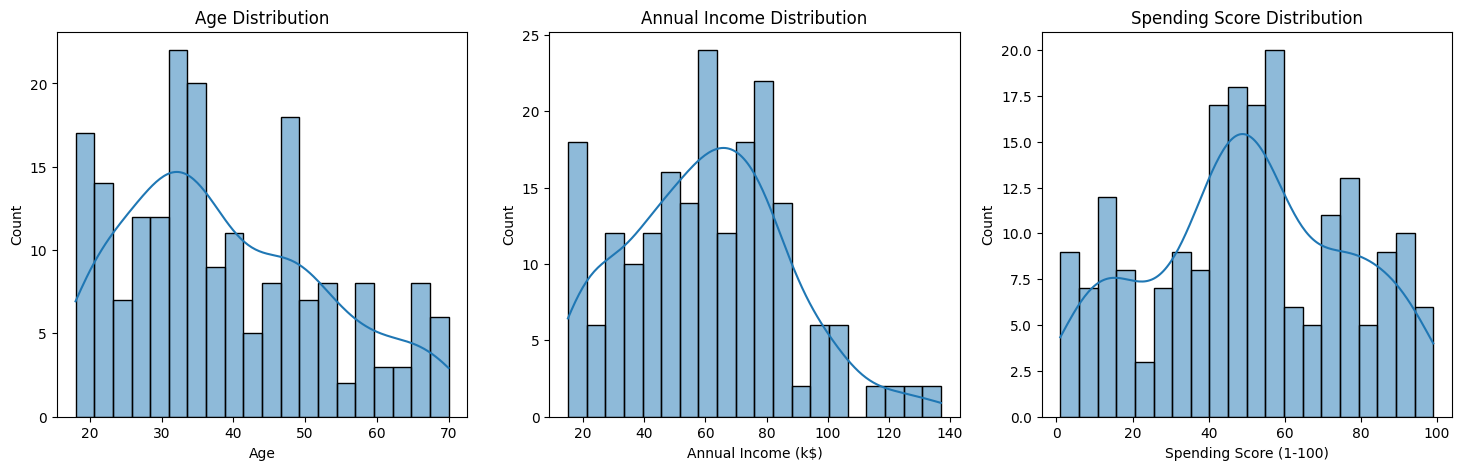

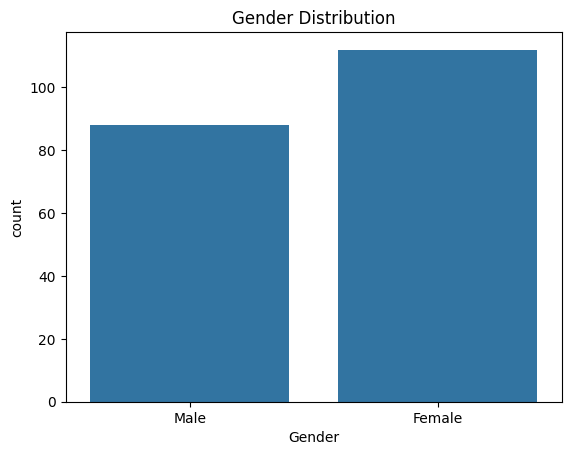

In [8]:
# Basic info
print(df.info())
print(df.describe())

# Distribution of Age, Income, Spending Score
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df["Age"], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Age Distribution")

sns.histplot(df["Annual Income (k$)"], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Annual Income Distribution")

sns.histplot(df["Spending Score (1-100)"], bins=20, kde=True, ax=axes[2])
axes[2].set_title("Spending Score Distribution")

plt.show()

# Gender distribution
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution")
plt.show()


In [9]:
# Select numerical features for clustering
X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


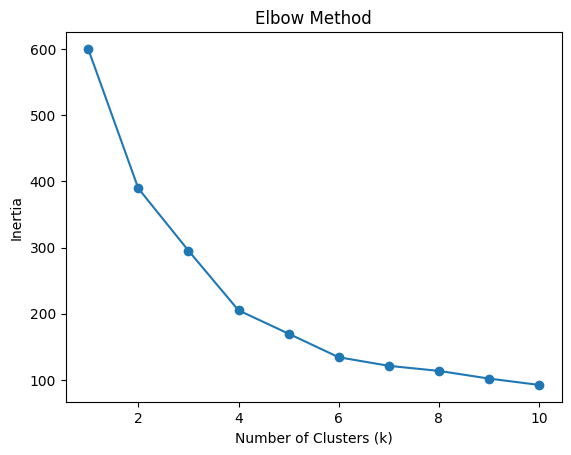

In [10]:
# Find optimal number of clusters using Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Train KMeans with chosen k (say k=5 from elbow curve)
kmeans = KMeans(n_clusters=10, random_state=42)
df["KMeans_Cluster"] = kmeans.fit_predict(X_scaled)


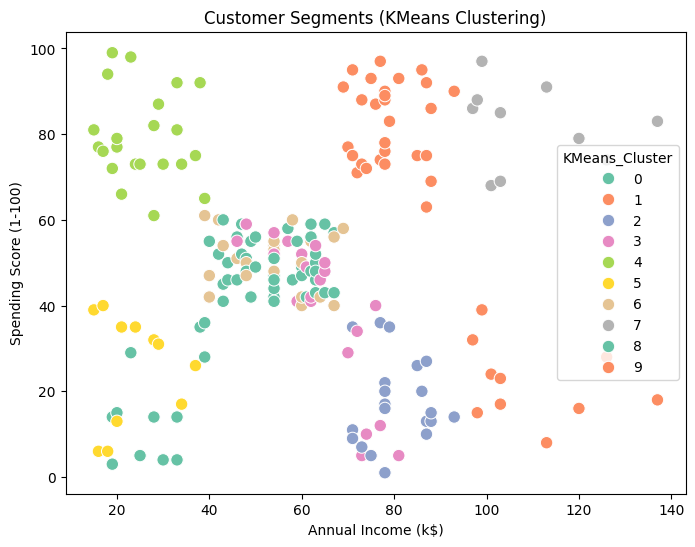

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df["Annual Income (k$)"],
    y=df["Spending Score (1-100)"],
    hue=df["KMeans_Cluster"],
    palette="Set2",
    s=80
)
plt.title("Customer Segments (KMeans Clustering)")
plt.show()


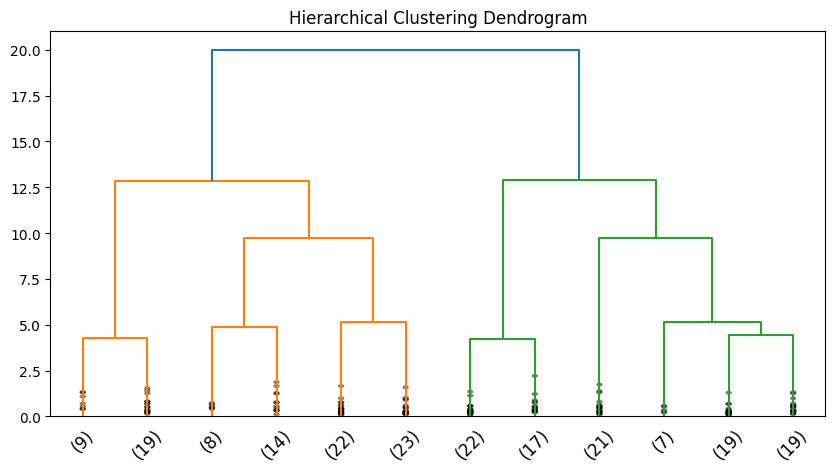

In [12]:
# Perform hierarchical clustering
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# Assign cluster labels (choose k=5 for example)
hier_clusters = fcluster(Z, 5, criterion='maxclust')
df["Hier_Cluster"] = hier_clusters


In [13]:
# Cluster summary
cluster_summary = df.groupby("KMeans_Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
print(cluster_summary)

# Example insights:
# - Young high-income + high-spending customers → Premium segment
# - Low-income + low-spending customers → Budget-conscious
# - High-income but low-spending customers → Need engagement strategies


                      Age  Annual Income (k$)  Spending Score (1-100)
KMeans_Cluster                                                       
0               56.720930           53.488372               48.976744
1               32.862069           78.551724               82.172414
2               46.000000           80.285714               16.809524
3               21.000000           63.227273               40.681818
4               25.272727           25.727273               79.363636
5               34.090909           23.545455               25.454545
6               33.409091           53.136364               50.318182
7               32.200000          109.700000               82.000000
8               55.200000           26.900000               13.000000
9               41.000000          109.700000               22.000000


In [14]:
# Apply K-Means (you can adjust n_clusters after elbow method)
kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)

In [15]:

# --------------------------
# Load and preprocess data
# --------------------------
df = pd.read_csv("Mall_Customers.csv")

# Encode Gender
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])  # Male=1, Female=0 (depending on dataset order)

# Select features
X = df[["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# --------------------------
# Prediction function
# --------------------------
def predict_cluster(gender, age, income, score):
    try:
        # Encode Gender safely
        gender_encoded = le.transform([gender])[0]  
        # Prepare input
        user_data = [[gender_encoded, age, income, score]]
        user_scaled = scaler.transform(user_data)
        cluster = kmeans.predict(user_scaled)[0]
        return f" Customer belongs to Cluster {cluster}"
    except Exception as e:
        return f"⚠️ Error: {str(e)}"

# --------------------------
# Gradio Interface
# --------------------------
interface = gr.Interface(
    fn=predict_cluster,
    inputs=[
        gr.Radio(["Male", "Female"], label="Gender"),
        gr.Number(label="Age"),
        gr.Number(label="Annual Income (k$)"),
        gr.Number(label="Spending Score (1-100)")
    ],
    outputs="text",
    title="Customer Segmentation with K-Means",
    description="Enter customer details to predict the cluster."
)

interface.launch()



* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [16]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
score = silhouette_score(X_scaled, kmeans.labels_)
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: 0.272


In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Test different k values
sil_scores = {}
for k in range(2, 14):  # You can change the range
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores[k] = score
    print(f"k={k}, Silhouette Score={score:.3f}")

# Best k
best_k = max(sil_scores, key=sil_scores.get)
print(f"\nBest number of clusters = {best_k} with Silhouette Score = {sil_scores[best_k]:.3f}")


k=2, Silhouette Score=0.252
k=3, Silhouette Score=0.260
k=4, Silhouette Score=0.298
k=5, Silhouette Score=0.304
k=6, Silhouette Score=0.331
k=7, Silhouette Score=0.357
k=8, Silhouette Score=0.388
k=9, Silhouette Score=0.403
k=10, Silhouette Score=0.421
k=11, Silhouette Score=0.428
k=12, Silhouette Score=0.424
k=13, Silhouette Score=0.418

Best number of clusters = 11 with Silhouette Score = 0.428


c:\Users\m8897\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\m8897\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\m8897\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\m8897\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
